## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 4.2: Extinction curve

#### uses extcurve_s16.py and cubicspline.py from https://faun.rc.fas.harvard.edu/eschlafly/apored/extcurve.html

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
import extcurve_s16

R_V = 3.3 power law index = -1.76
R_V = 3.6 power law index = -1.72
R_V = 3.0 power law index = -1.79


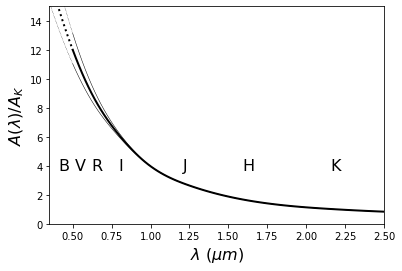

In [15]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(1,1,1)
#ax1.set_xlabel('$\lambda$ (nm)', fontsize=16)
ax1.set_xlabel('$\lambda\ (\mu m)$', fontsize=16)
ax1.set_ylabel('$A(\lambda)/A_K$', fontsize=16)
#ax1.set_xlim(350,2500)
ax1.set_xlim(0.350,2.500)
#ax1.set_ylim(0,1.3)
ax1.set_ylim(0,15)

lam = np.linspace(500,2500, 100)
lam_ext = np.linspace(350,500, 10)
oir = np.nonzero((lam > 500) & (lam < 3000))

ec = extcurve_s16.extcurve(0.0)
#f = ec(5420)/ec(5510)
f = ec(5420)/ec(21900)
x = np.log10(lam)
y = f*ec(10*lam)
w = 500/lam[oir]
w = lam[oir] * 0 + 1
a,b = np.polyfit(x[oir],np.log10(y[oir]),1,w=w)
print("R_V = 3.3 power law index = {0:4.2f}".format(a))
#ax1.plot(10**x,10**(a*x+b),'r-')
#ax1.plot(lam, y, 'k-', lw=2)
#ax1.plot(lam_ext, f*ec(10*lam_ext), 'k:', lw=2)
ax1.plot(lam/1000, y, 'k-', lw=2)
ax1.plot(lam_ext/1000, f*ec(10*lam_ext), 'k:', lw=2)

ec = extcurve_s16.extcurve(0.04)
#f = ec(5420)/ec(5510)
f = ec(5420)/ec(21900)
y = f*ec(10*lam)
a,b = np.polyfit(x[oir],np.log10(y[oir]),1,w=w)
print("R_V = 3.6 power law index = {0:4.2f}".format(a))
#ax1.plot(10**x,10**(a*x+b),'r-')
#ax1.plot(lam, f*ec(10*lam), 'k-', lw=0.5)
#ax1.plot(lam_ext, f*ec(10*lam_ext), 'k:', lw=0.5)
ax1.plot(lam/1000, f*ec(10*lam), 'k-', lw=0.5)
ax1.plot(lam_ext/1000, f*ec(10*lam_ext), 'k:', lw=0.5)

ec = extcurve_s16.extcurve(-0.04)
#f = ec(5420)/ec(5510)
f = ec(5420)/ec(21900)
y = f*ec(10*lam)
a,b = np.polyfit(x[oir],np.log10(y[oir]),1,w=w)
print("R_V = 3.0 power law index = {0:4.2f}".format(a))
ax1.plot(lam/1000, f*ec(10*lam), 'k-', lw=0.5)
ax1.plot(lam_ext/1000, f*ec(10*lam_ext), 'k:', lw=0.5)

ylab = 3.7
plt.text(.445, ylab, 'B', fontsize=16, ha='center')
plt.text(.551, ylab, 'V', fontsize=16, ha='center')
plt.text(.656, ylab, 'R', fontsize=16, ha='center')
plt.text(.806, ylab, 'I', fontsize=16, ha='center')
plt.text(1.220,ylab, 'J', fontsize=16, ha='center')
plt.text(1.630,ylab, 'H', fontsize=16, ha='center')
plt.text(2.190,ylab, 'K', fontsize=16, ha='center')

plt.savefig('extinction.pdf')